# Matrix factorization in Recommendation System

This notebook is used to demonstrate Matrix factorization in Recommendation System, using different Python libraries

## Recommendation system
RecSys is an approach to  the  issue  like  to **provide  suitable  things  to  the  customer** despite  of  searching  lots  of  items.

RecSys is software  tools  and  techniques  that **provide  suggestion based  on  the  individual’s  taste**  to  discover  new  required content for them.

RecSys  perceive     suggestion’s consequently    to    the    customers    by    **analyzing    previous browsing  history,  the  feedback  assigned  to  the  products  and different user’s behavior**.

## Colaborative filtering
![](https://upload.wikimedia.org/wikipedia/commons/5/52/Collaborative_filtering.gif)
In the newer, **narrower sense**, collaborative filtering (CF) is a method of **making automatic predictions** (filtering) about the interests of a user by **collecting preferences** or taste information from many users (collaborating)

In the more **general sense**, collaborative filtering is the process of filtering for information or patterns using techniques involving collaboration among multiple agents, viewpoints, data sources, etc.

![](https://cdn-images-1.medium.com/max/1371/1*QvhetbRjCr1vryTch_2HZQ.jpeg)
### User-based CF
$$
\text{predicted_score}(u,i)=\overline{r_u}+\frac{\sum_{u'\in N_u}\text{similarity}(u, u')\cdot(r_{u',i}-\overline{r_{u'}})}{\sum_{u'\in N_u}\text{similarity}(u,u')}
$$

1. Look for users who share the same rating patterns with the active user (the user whom the prediction is for).
2. Use the ratings from those like-minded users found in step 1 to calculate a prediction for the active user

### Item-based CF
(users who bought x also bought y)
$$
\text{predicted_score}(u,i)=\frac{\sum_{i'\in I_i}r_{u, i'}\cdot \text{similarity}(i, i')}{\sum_{i'\in I_i}\text{similarity}(i, i')}
$$
1. Build an item-item matrix determining relationships between pairs of items
2. Infer the tastes of the current user by examining the matrix and matching that user's data

### Matrix factorization
![](https://cdn-images-1.medium.com/max/1371/1*Zhm1NMlmVywn0G18w3exog.png)

$$
\text{score}(user(u),item(i)) = user\_vector(u) \cdot item\_vector(i)
$$

## MovieLens 100k dataset
[Link](http://files.grouplens.org/datasets/movielens/ml-100k.zip)

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
- 100,000 ratings (1-5) from 943 users on 1682 movies. 
- Each user has rated at least 20 movies. 
- Simple demographic info for the users (age, gender, occupation, zip)

### Data exploration

In [3]:
!head -10 ../movielens/ml-100k/u.info

943 users
1682 items
100000 ratings


In [10]:
import pandas as pd
%matplotlib inline

In [6]:
userDF = pd.read_table('../movielens/ml-100k/u.user', sep='|', header=None, 
                       names=['userid', 'age', 'gender', 'occupation', 'zipcode'],
                      index_col='userid')
userDF.head()

,age,gender,occupation,zipcode
userid,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


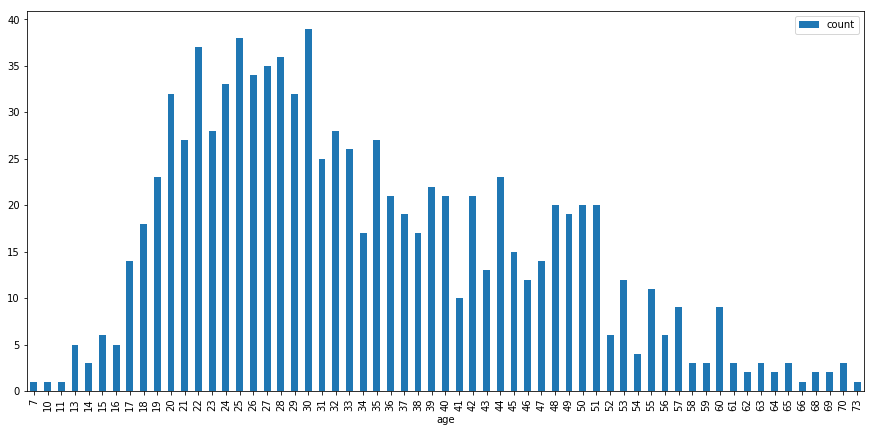

In [24]:
userDF.groupby(['age'])\
      .agg({'gender': 'count'})\
      .rename(columns={'gender': 'count'})\
      .plot(kind='bar', figsize=(15,7))

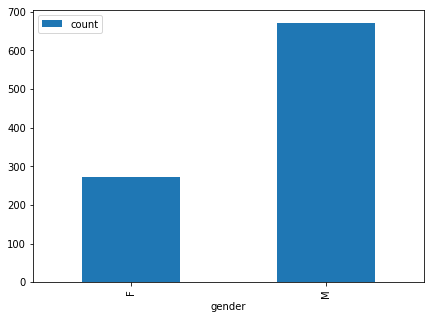

In [26]:
userDF.groupby(['gender'])\
      .agg({'age': 'count'})\
      .rename(columns={'age': 'count'})\
      .plot(kind='bar', figsize=(7,5))

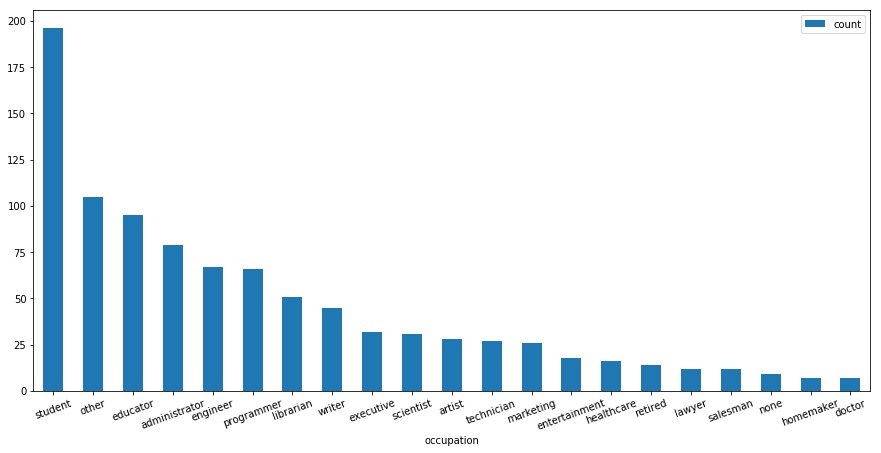

In [29]:
userDF.groupby(['occupation'])\
      .agg({'gender': 'count'})\
      .rename(columns={'gender': 'count'})\
      .sort_values(by='count', axis=0, ascending=False)\
      .plot(kind='bar', figsize=(15,7), rot=20)

In [32]:
itemDf = pd.read_csv('../movielens/ml-100k/u.item1', sep='|', header=None, ) 
#                        names=['userid', 'age', 'gender', 'occupation', 'zipcode'],
#                       index_col='userid')

In [36]:
itemDf

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Implementation with Pyspark